# Plotting enrichment in kegg pathways from Corsair results

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Get the data. KEGG pathway, ratio of genes ((count / total genes in set) / number of genes in KEGG pathway)

In [51]:
keggs = {}
keggs['hsap'] = pd.read_csv("kegg_counting/Hsap_kegg_counting.csv")
keggs['mluc'] = pd.read_csv("kegg_counting/Mluc_kegg_counting.csv")
keggs['pman'] = pd.read_csv("kegg_counting/Pman_kegg_counting.csv")
keggs['mmus'] = pd.read_csv("kegg_counting/Mmus_kegg_counting.csv")
keggs['btau'] = pd.read_csv("kegg_counting/Btau_kegg_counting.csv")
keggs['clup'] = pd.read_csv("kegg_counting/Clup_kegg_counting.csv")

keggs['hsap'].head()

,Pathway,Ratio,Hits,Total
0,Carbohydrate metabolism,0.000043,37,357
1,Energy metabolism,0.000021,8,159
2,Lipid metabolism,0.000041,39,393
3,Nucleotide metabolism,0.000037,14,155
4,Amino acid metabolism,0.000039,27,289


Only allow categories where we have at least X genes in the pathway

In [52]:
min_genes = 5

for kegg in keggs:
    keggs[kegg] = keggs[kegg][keggs[kegg]['Total'] >= 5]

## 1) Find the top 5 most common pathways in each set, see how each set compares

In [53]:
def most_common(df, X):
    """
    Find the X most common kegg pathways in the data frame
    Return a list of the pathways
    """
    df = df.sort_values(by=['Ratio'], ascending=False)
    df = df.head(X)
    return df['Pathway'].values

In [62]:
num_hits = 5

tops = []
for kegg in keggs:
    tops.append(most_common(keggs[kegg], num_hits))
tops = set([item for sublist in tops for item in sublist])
print(tops)
print("{} / {}".format(len(tops), (len(keggs) * num_hits)))

{'Type II diabetes mellitus', 'D-Glutamine and D-glutamate metabolism', 'Glycosaminoglycan degradation', 'Nicotine addiction', 'Cytokine receptors', 'Hematopoietic cell lineage', 'Primary bile acid biosynthesis', 'Mismatch repair', 'Complement and coagulation cascades', 'Prion diseases', 'Neomycin', 'Others', 'Renin-angiotensin system', 'Selenocompound metabolism', 'Vitamin B6 metabolism', 'Taurine and hypotaurine metabolism', 'Caffeine metabolism', 'Vitamin digestion and absorption', 'Biosynthesis of unsaturated fatty acids', 'Phosphonate and phosphinate metabolism', 'Intestinal immune network for IgA production', 'Bacterial toxins', 'Cofactor metabolism', 'Primary immunodeficiency', 'Ion channels'}
25 / 30


Make a data frame that has the properties [Pathway,Clade,Ratio] such that the pathways are from the tops list and we have the ratio for each clade for each pathway.

In [133]:
plotdf = pd.DataFrame(columns=('Pathway','Clade','Ratio'))
## these are what names will actually get printed
names = {
    'hsap' : 'Primates',
    'mluc' : 'Ciroptera',
    'pman' : 'Cricetidae',
    'mmus' : 'Murinae',
    'btau' : 'Bovidae',
    'clup' : 'Caniformia'
}

for kegg in keggs:
    df = keggs[kegg]
    for top in tops:
        pathway = top
        clade = names[kegg]
        ratio = float(df[df['Pathway'] == top].values[0][1])
        d1 = pd.DataFrame(np.array([[pathway,clade,ratio]]), columns=['Pathway', 'Clade', 'Ratio'])
        plotdf = plotdf.append(d1)
plotdf = plotdf.reset_index(drop=True)
plotdf['Pathway'] = plotdf['Pathway'].astype(str)
plotdf['Clade'] = plotdf['Clade'].astype(str)
plotdf['Ratio'] = plotdf['Ratio'].astype(float)
print(plotdf.head())
plotdf.dtypes

                                  Pathway     Clade     Ratio
0               Type II diabetes mellitus  Primates  0.000045
1  D-Glutamine and D-glutamate metabolism  Primates  0.000000
2           Glycosaminoglycan degradation  Primates  0.000043
3                      Nicotine addiction  Primates  0.000052
4                      Cytokine receptors  Primates  0.000077


Pathway     object
Clade       object
Ratio      float64
dtype: object

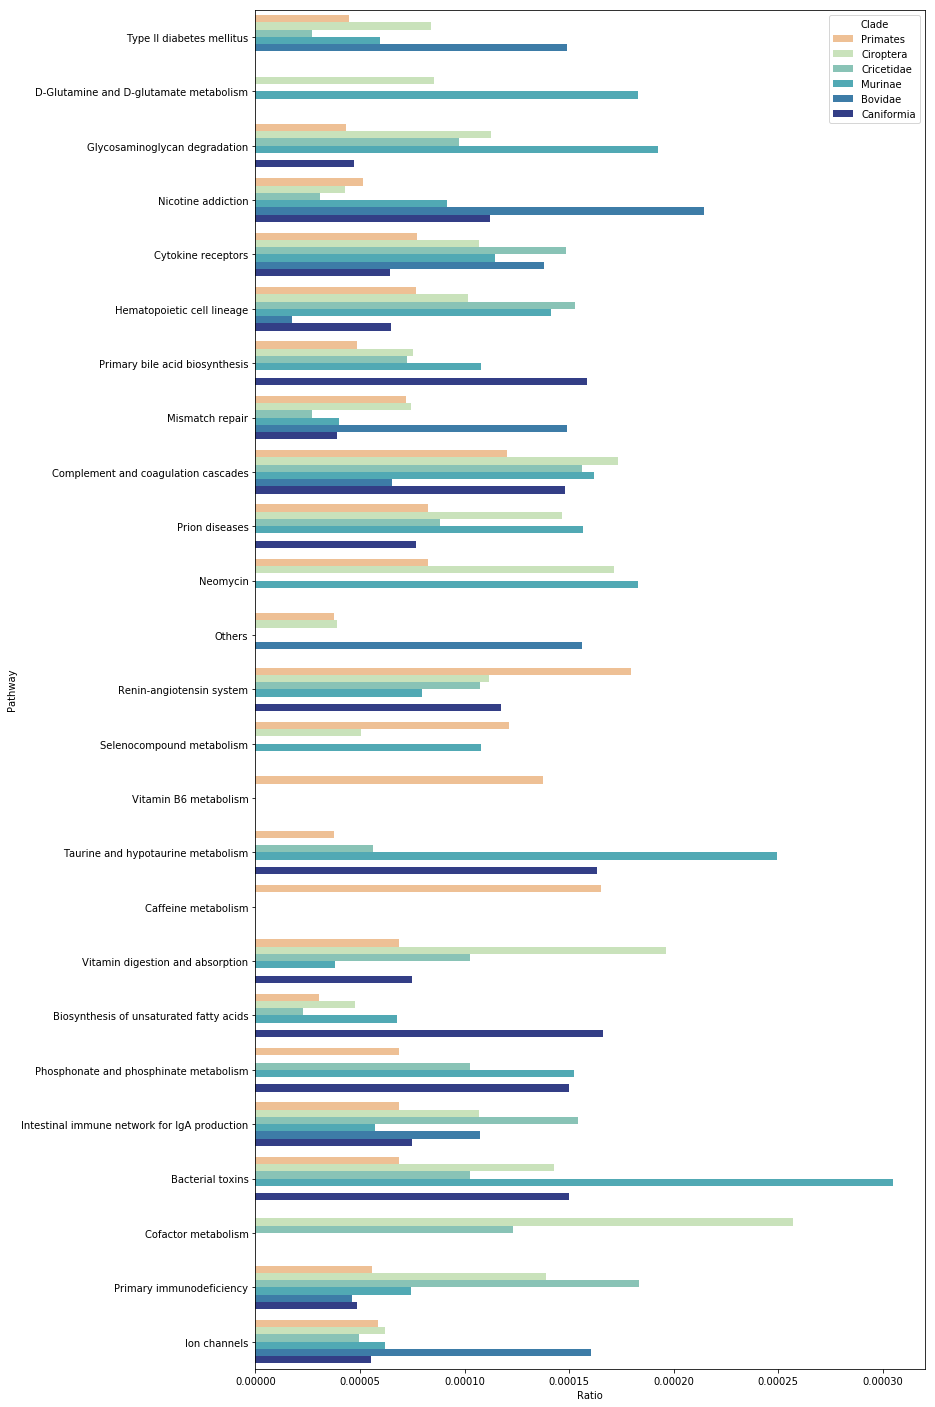

In [152]:
## colors (first few are just other options)
brown_to_green = ["#8c510a", "#d8b365", "#f6e8c3", "#c7eae5", "#5ab4ac", "#01665e"]
pastels = ["#7fc97f", "#beaed4", "#fdc086", "#ffff99", "#386cb0", "#f0027f"]
sequence = ["#ffffcc", "#c7e9b4", "#7fcdbb", "#41b6c4", "#2c7fb8", "#253494"] 
sequence2 = ["#fdc086", "#c7e9b4", "#7fcdbb", "#41b6c4", "#2c7fb8", "#253494"] 

## actual plot
plt.figure(figsize=(12,25))
ax = sns.barplot("Ratio", "Pathway", hue="Clade", ci=None, palette=sequence2, data=plotdf)

There are 25 / 30 pathways when we take the top 5 from each clade. The most heavily represnted pathways look to be Nicotine Addition, Cytokine receptors, Complement and conjugations cascades, intestinal immune network for IgA production, primary immunodeficiency, ion channels.

## 2) Most Unqiue Pathways
Which pathways have the most descrepency between one clade and the other clades? This could be due to high enrichment in one clade, or high in all clades except one.